# US BABY NAMES

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 01. Đọc dữ liệu

In [2]:
df = pd.read_csv('../data/US_Baby_Names.csv', header=0, delimiter=',', encoding='utf-8')

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [3]:
df.sample(10, random_state=99)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
394,11743,11744,Isis,2005,F,AK,5
383632,2062747,2062748,Allen,2011,M,KY,13
208453,1076538,1076539,Zenaida,2014,F,FL,6
155915,805960,805961,Gilbert,2010,M,CO,9
139582,754819,754820,Eileen,2004,F,CO,10
491091,2696632,2696633,Summer,2014,F,MN,28
579862,3262886,3262887,Zoey,2007,F,NE,27
104977,563040,563041,Estefani,2014,F,CA,17
263318,1326546,1326547,Khari,2014,M,GA,7
511281,2815004,2815005,Abrielle,2013,F,MO,8


### 03. Cho biết kích thước dữ liệu

In [4]:
np.size(df)

7114765

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [5]:
df.drop(columns=['Unnamed: 0', 'Id'], inplace=True)

In [6]:
df

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### 05. Cho biết số lượng bé trai, bé gái?

In [7]:
df['Gender'].value_counts()

Gender
F    558846
M    457549
Name: count, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [8]:
df['Name'].value_counts()

Name
Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: count, Length: 17632, dtype: int64

### 07. Tên nào xuất hiện ít nhất?

In [9]:
names_count = df['Name'].value_counts()
count = names_count == 1
print(names_count[count])

Name
Grettell    1
Dawsen      1
Abenezer    1
Greenley    1
Daiden      1
           ..
Terryn      1
Yanna       1
Zemirah     1
Emmilyn     1
Coalton     1
Name: count, Length: 3682, dtype: int64


Số tên ít xuất hiện nhất là 3682 tên

### 08. Top 10 tên được sử dụng nhiều nhất?

In [10]:
df['Name'].value_counts().head(10)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

In [11]:
df_2014 = df[df['Year'] == 2014]

In [12]:
df_2014

,Name,Year,Gender,State,Count
2173,Emma,2014,F,AK,50
2174,Olivia,2014,F,AK,47
2175,Sophia,2014,F,AK,43
2176,Aurora,2014,F,AK,35
2177,Isabella,2014,F,AK,33
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


In [13]:
df_top10 = df_2014['Name'].value_counts().head(10)

In [14]:
df_top10

Name
Avery      102
Riley      100
Hayden      98
Peyton      96
Parker      95
Jordan      93
Sawyer      91
Rowan       91
Charlie     90
Logan       89
Name: count, dtype: int64

In [17]:
name = df_top10.index
top10_name_counts = df_top10.values

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_11508\582692123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name, y=top10_name_counts, palette=pastel_colors).set(title='Đồ thị histogram về top 10 tên xuất hiện nhiều nhất năm 2014')


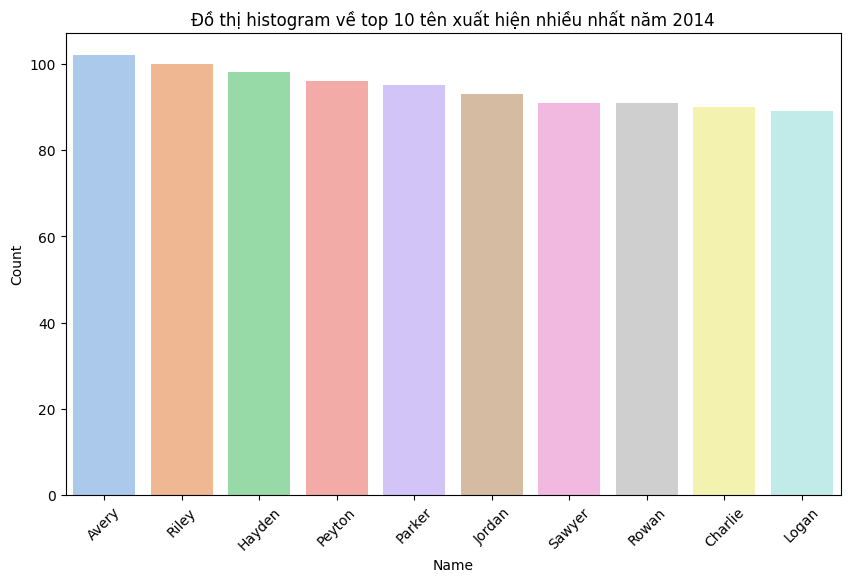

In [21]:
# Tạo bảng màu pastel
pastel_colors = sns.color_palette("pastel", len(name))

# Vẽ histogram với màu pastel cho mỗi cột
plt.figure(figsize=(10, 6))
sns.barplot(x=name, y=top10_name_counts, palette=pastel_colors).set(title='Đồ thị histogram về top 10 tên xuất hiện nhiều nhất năm 2014')
plt.xticks(rotation=45)
plt.xlabel("Name")
plt.ylabel("Count")

# Hiển thị đồ thị
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

In [22]:
# Lọc dữ liệu từ năm 2004 đến năm 2014
df_2004_2014 = df.loc[(df['Year']>=2004)&(df['Year']<=2014)]

In [23]:
df_2004_2014

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


In [24]:
x, y, hue = 'Sex', 'Proportion', 'Gender'
hue_order = ['F', 'M']
df_2004_2014_prop = df_2004_2014['Gender'].groupby(df_2004_2014['Year']).value_counts(normalize=True).rename(y).reset_index()

In [25]:
df_2004_2014_prop

,Year,Gender,Proportion
0,2004,F,0.556387
1,2004,M,0.443613
2,2005,F,0.555925
3,2005,M,0.444075
4,2006,F,0.553914
5,2006,M,0.446086
6,2007,F,0.553725
7,2007,M,0.446275
8,2008,F,0.553522
9,2008,M,0.446478


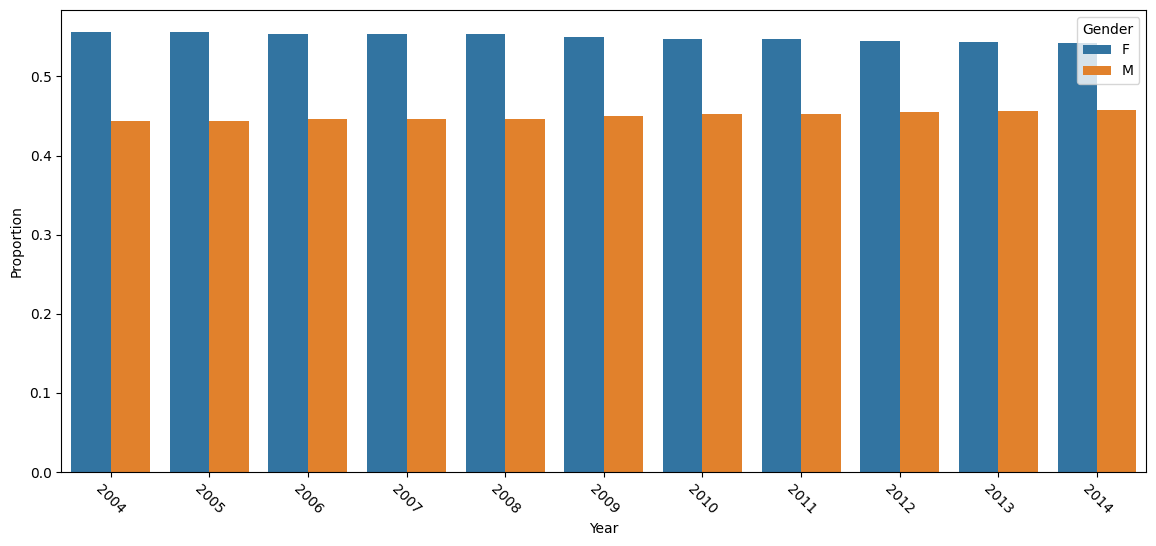

In [27]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_2004_2014_prop, x='Year', y='Proportion', hue='Gender')
plt.xticks(rotation=-45)

plt.show()